In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
crash_df = sns.load_dataset('car_crashes')
tips_df = sns.load_dataset('tips')

matrix plots

Heatmaps

In [3]:
plt.figure(figsize=(8,6))
sns.set_context('paper')
#crash_mx = crash_df.corr()
crash_df.head(2)

crash_df.drop(columns='abbrev', inplace=True)# we removed 'abbrev' from the dataframe cause it was an object and would not allow the heatmap to be created

<Figure size 800x600 with 0 Axes>

<Axes: >

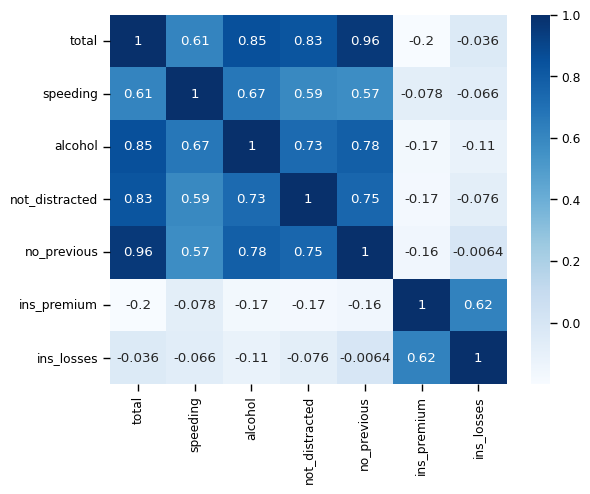

In [4]:
crash_mx= crash_df.corr()
fig ,x = plt.subplots()
sns.heatmap(crash_mx, cmap= 'Blues', annot=True)


second way of plotting a heatmap, pivot_table

/tmp/ipykernel_174839/72356236.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flight = flight.pivot_table(index= 'month', columns= 'year', values='passengers')


<Axes: xlabel='year', ylabel='month'>

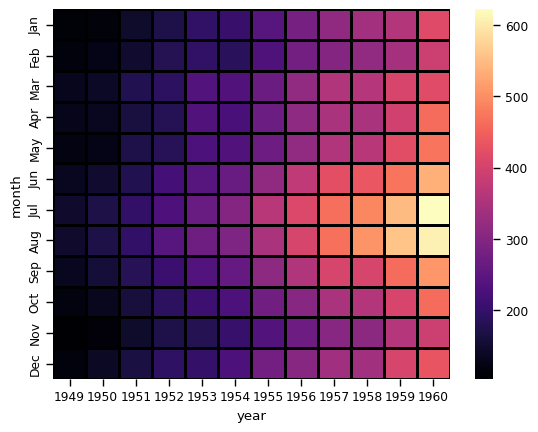

In [5]:
flight = sns.load_dataset('flights')
flight = flight.pivot_table(index= 'month', columns= 'year', values='passengers')
sns.heatmap(flight, cmap='magma', linecolor='black', linewidth=1 )

matplotlib correlation matrix heatmap 

/tmp/ipykernel_174839/614517467.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x.set_xticklabels(crash_mx.columns, rotation=65, fontsize=8)
/tmp/ipykernel_174839/614517467.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x.set_yticklabels(crash_mx.columns, rotation=0, fontsize=8)


<Figure size 800x800 with 0 Axes>

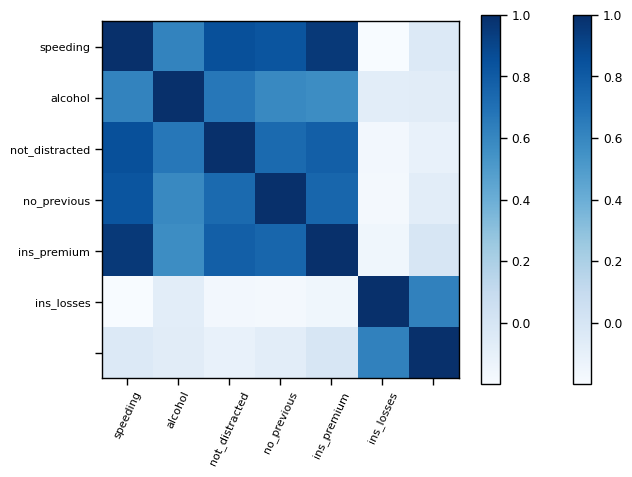

In [6]:
plt.figure(figsize=(8,8))
fig, x = plt.subplots()
im = x.imshow(crash_mx, interpolation= 'nearest', cmap = 'Blues')
fig.colorbar(im, orientation='vertical', fraction = 0.05)


x.set_xticklabels(crash_mx.columns, rotation=65, fontsize=8)
x.set_yticklabels(crash_mx.columns, rotation=0, fontsize=8)

plt.colorbar(im)
plt.show()

cluster map
iris = sns.load_dataset('iris')
iris.info()
#species = iris.pop('species')
iris.drop('species')

sns.clustermap(iris)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


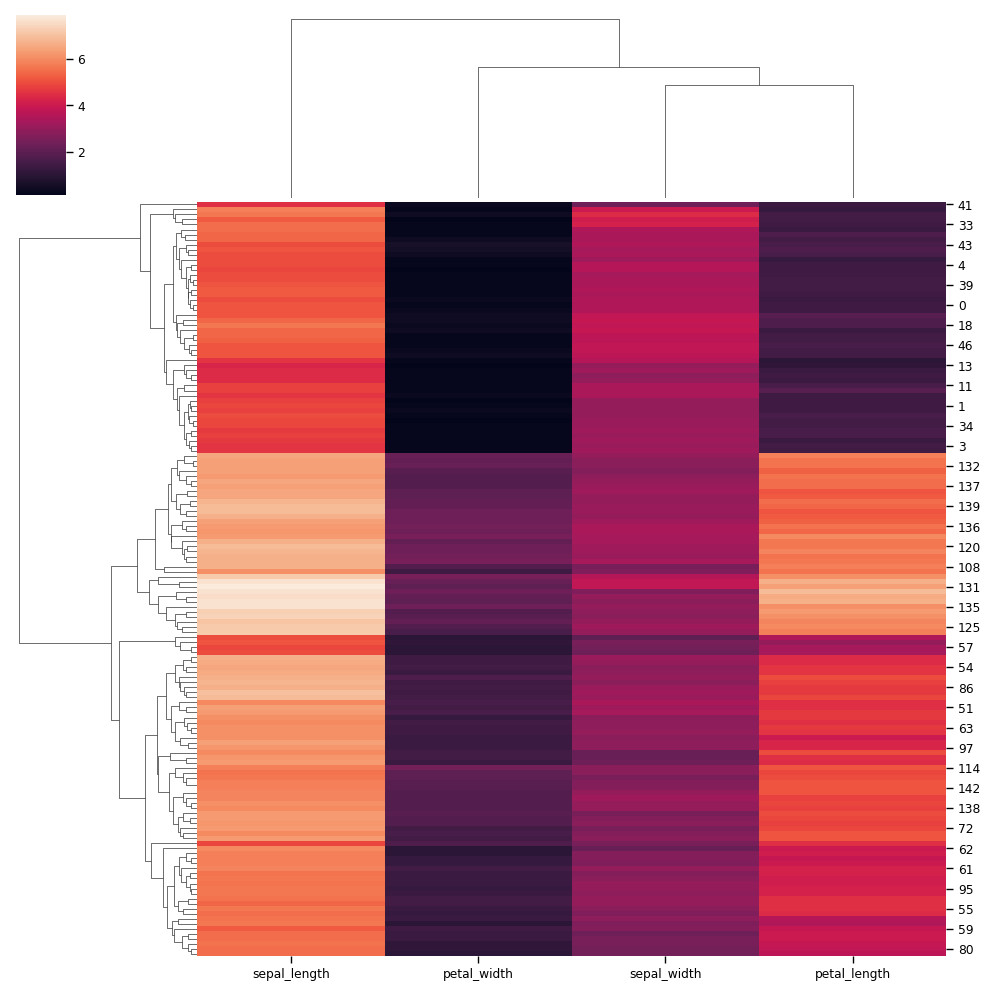

In [7]:
iris = sns.load_dataset('iris')
iris.info()
species = iris.pop('species')
sns.clustermap(iris)

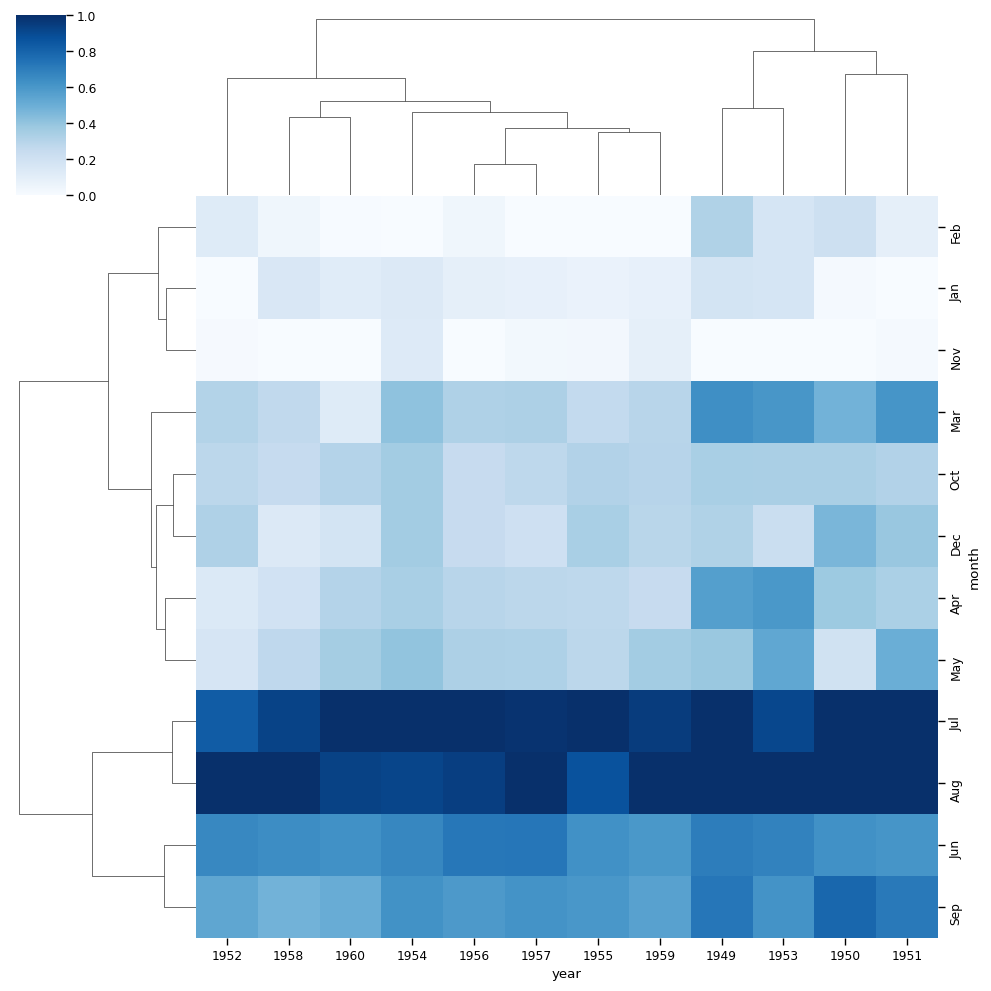

In [8]:
sns.clustermap(flight, cmap ='Blues', standard_scale=1)


In [9]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


pairGrid

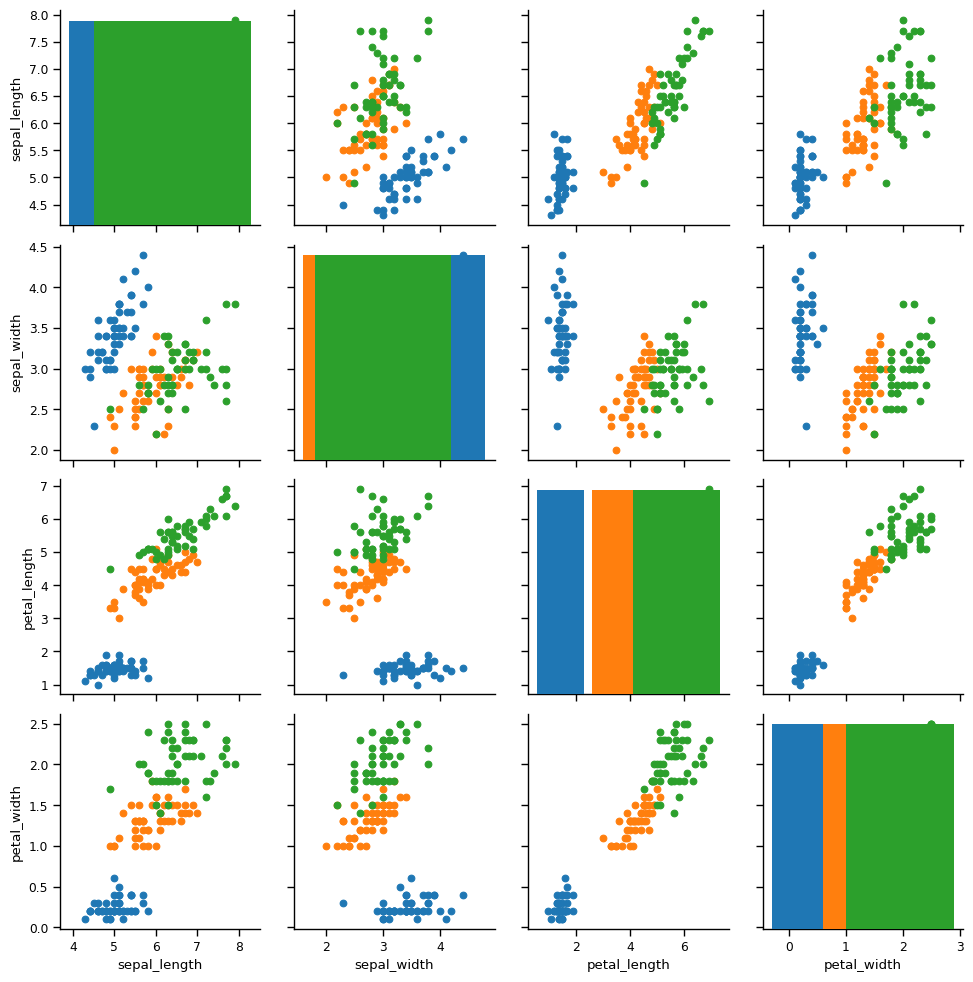

In [10]:
iris2 = sns.load_dataset('iris')

iris_g2 = sns.PairGrid(iris2, hue='species')
iris_g2.map(plt.scatter)

iris_g2.map_diag(plt.bar, height= 0.0005)


Facet Grid

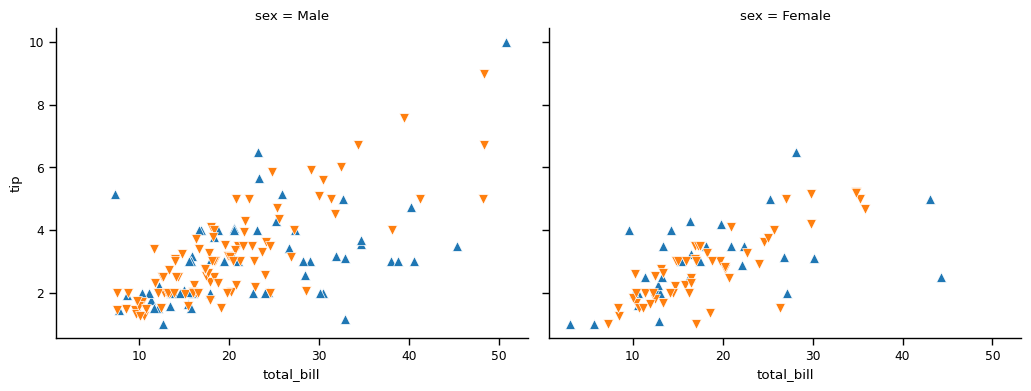

In [11]:
# tips_fg = sns.FacetGrid(tips_df, col= 'time', hue='smoker', height=4, aspect=1.3,
#                         col_order=['Dinner', 'Lunch'], palette='Set1')


# tips_fg.map(plt.hist, 'total_bill', bins= 8)
# tips_fg.map(plt.scatter, 'total_bill', 'tip')
# tips_fg.map(plt.scatter, 'total_bill', 'tip')


kws = dict(s=50, linewidth= .5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3
                        ,hue_order=['Yes', 'No'],
                        hue_kws=dict(marker=['^', 'v']))

tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

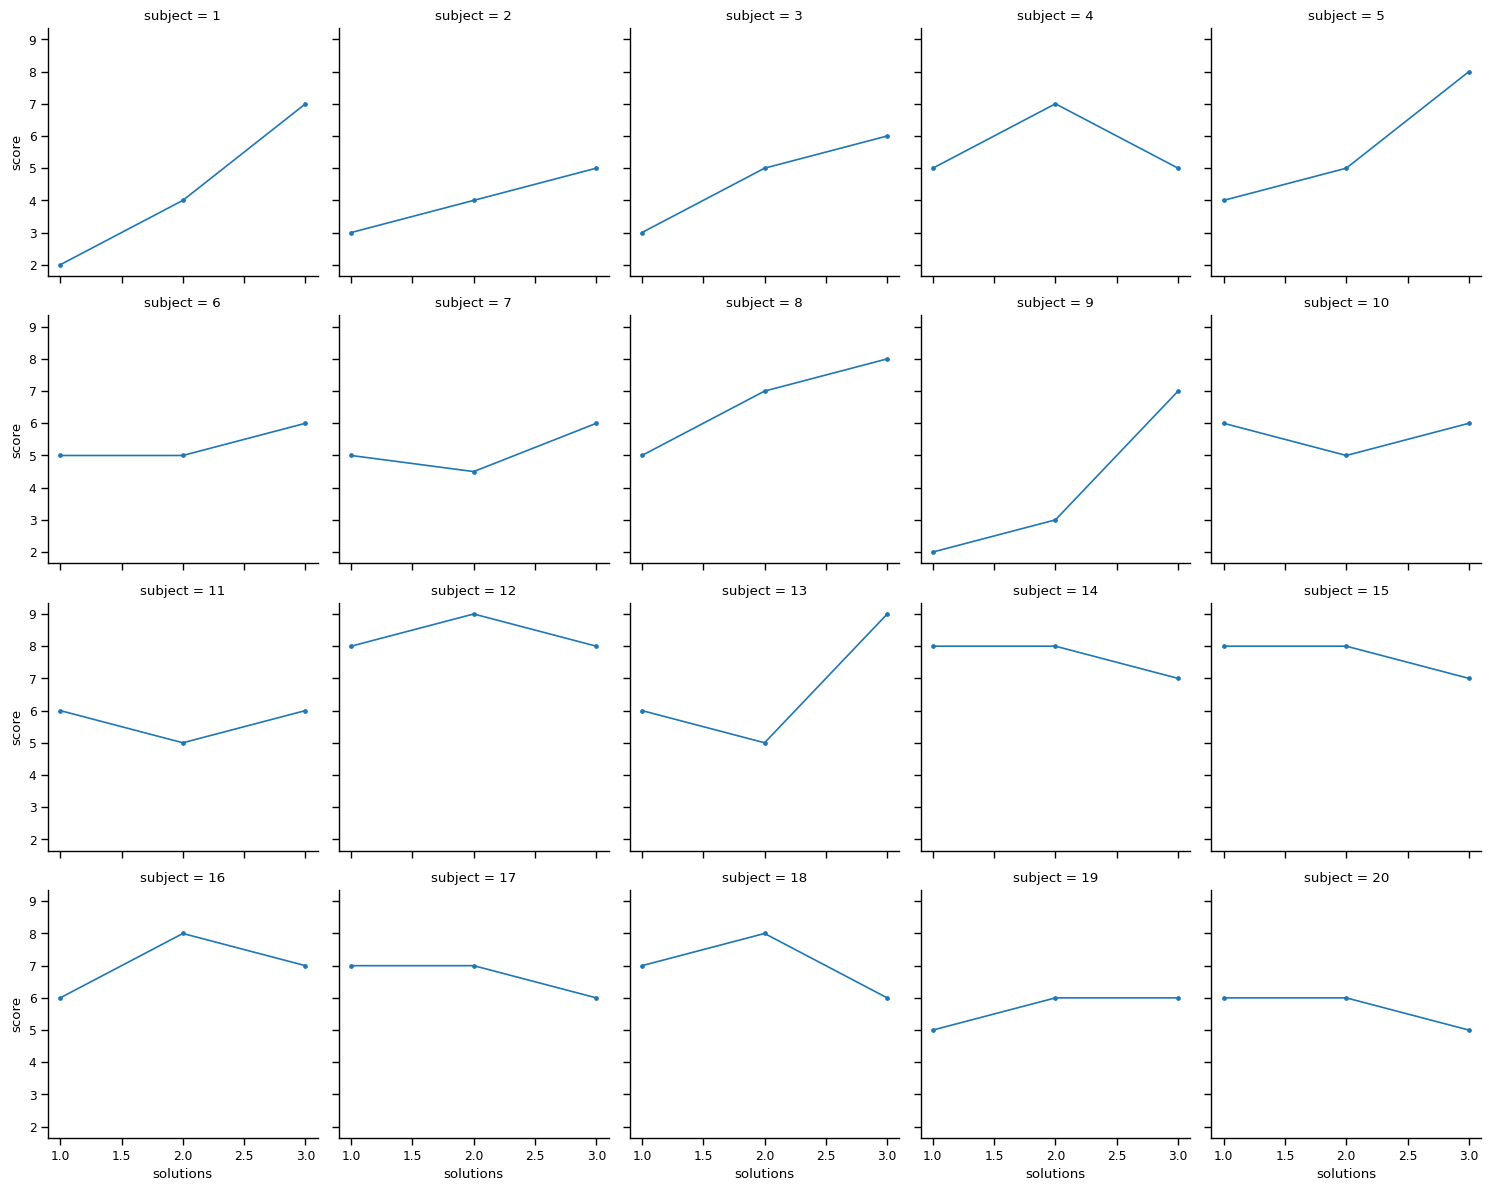

In [12]:
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df,col= 'subject', col_wrap= 5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')


Regression plots

In [13]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1100x1100 with 0 Axes>

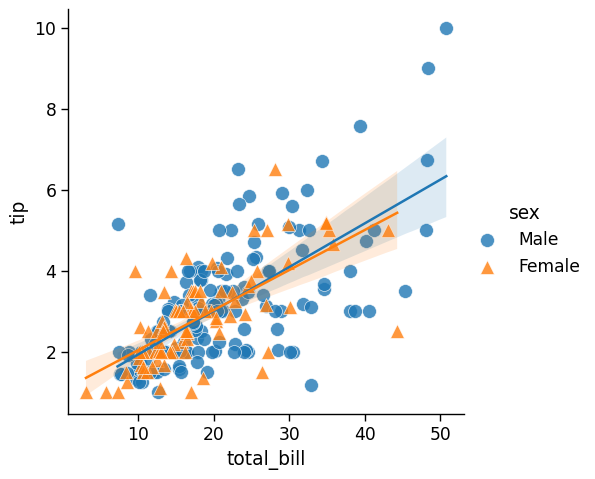

In [25]:
plt.figure(figsize=(11,11))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y= 'tip', hue= 'sex', data=tips_df, markers=['o', '^'],
           scatter_kws={'s': 100, 'linewidths': 0.5, 'edgecolor': 'white'})



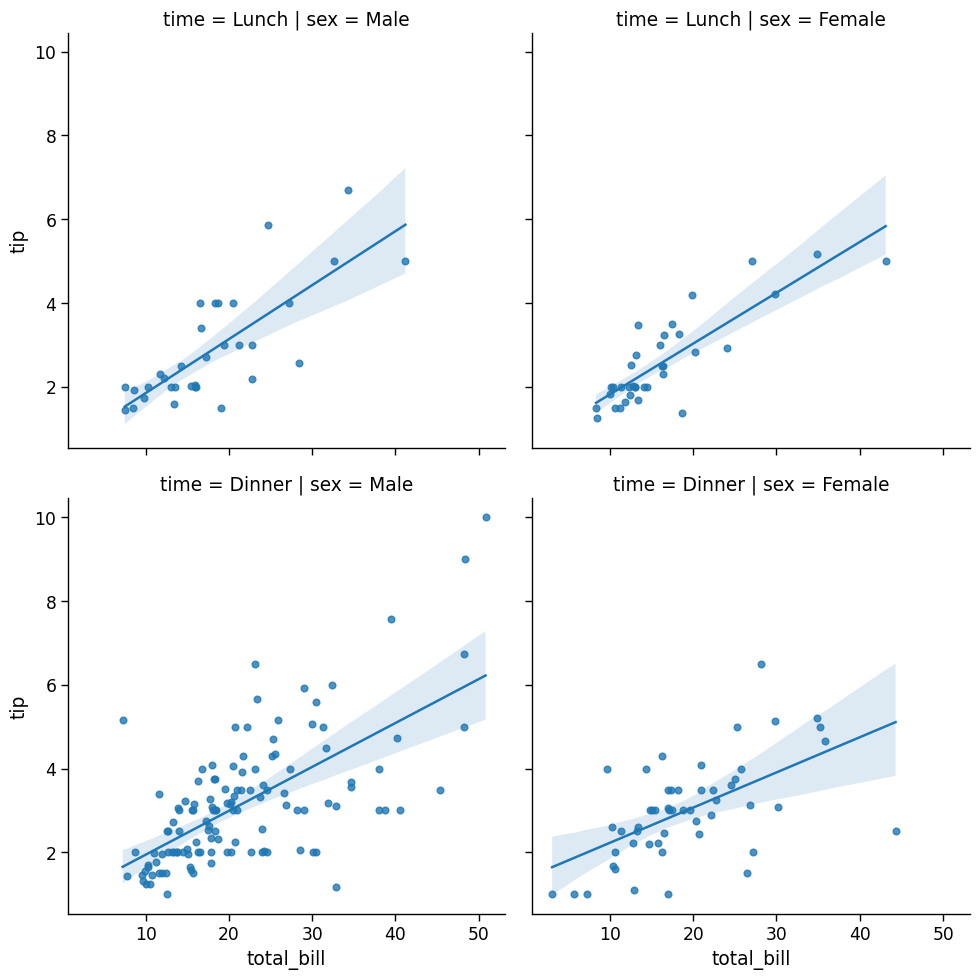

In [24]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data= tips_df)